https://www.kaggle.com/competitions/home-credit-default-risk/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("application_train.csv")

Data dictionary:
1. name_family_status
   * Civil married - Registered married, not religious way. consider equivalant to married.
   * Unknown - only 2 values. Consider Married.
2. region_population_relative
   * normalized population of the region where the client lives.
3. days_birth
   * Days since applicant birth.
   * calculate age from this.
4. days_employed
   * how many days before the loan application the applicant started their current employment.
  
5. obs_30_cnt_social_circle - "How many people close to this applicant defaulted in the last 30 days?"
6. DEF_30_CNT_SOCIAL_CIRCLE - cumulative or historical count of serious payment delinquencies (30+ days late) in the applicant’s network.
7. ext_source_1 - A normalized external risk score — provided by a third-party credit bureau or scoring system, outside Home Credit.
8. amt_req_credit_bureau_day - No. of time refered to bureau regarding the applicant
9. amt_goods_price - The price of the goods the client wants to purchase with the loan.
10. amt_annuity - The monthly annuity amount the client is expected to pay back to the lender — essentially, their monthly loan installment.

In [4]:
train.columns = train.columns.str.lower()

In [5]:
train['name_family_status'].value_counts()

name_family_status
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [6]:
train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### EDA on application train data

In [7]:
# Traget distribution
train['target'].value_counts(normalize=True)

target
0    0.919271
1    0.080729
Name: proportion, dtype: float64

91% of loan applicants have not defaulted the loan.
Balance data using <b>SMOTE<b/>

In [8]:
# Null %
missing = train.isnull().mean().sort_values(ascending=False)
missing[missing > 0.2] * 100

commonarea_avg                  69.872297
commonarea_mode                 69.872297
commonarea_medi                 69.872297
nonlivingapartments_medi        69.432963
nonlivingapartments_mode        69.432963
nonlivingapartments_avg         69.432963
fondkapremont_mode              68.386172
livingapartments_avg            68.354953
livingapartments_medi           68.354953
livingapartments_mode           68.354953
floorsmin_mode                  67.848630
floorsmin_avg                   67.848630
floorsmin_medi                  67.848630
years_build_avg                 66.497784
years_build_mode                66.497784
years_build_medi                66.497784
own_car_age                     65.990810
landarea_medi                   59.376738
landarea_avg                    59.376738
landarea_mode                   59.376738
basementarea_mode               58.515956
basementarea_medi               58.515956
basementarea_avg                58.515956
ext_source_1                    56

In [9]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [10]:
train.select_dtypes('object').nunique().sort_values(ascending=False)

organization_type             58
occupation_type               18
name_income_type               8
name_type_suite                7
wallsmaterial_mode             7
weekday_appr_process_start     7
name_family_status             6
name_housing_type              6
name_education_type            5
fondkapremont_mode             4
housetype_mode                 3
code_gender                    3
flag_own_car                   2
name_contract_type             2
flag_own_realty                2
emergencystate_mode            2
dtype: int64

<Figure size 1500x2000 with 0 Axes>

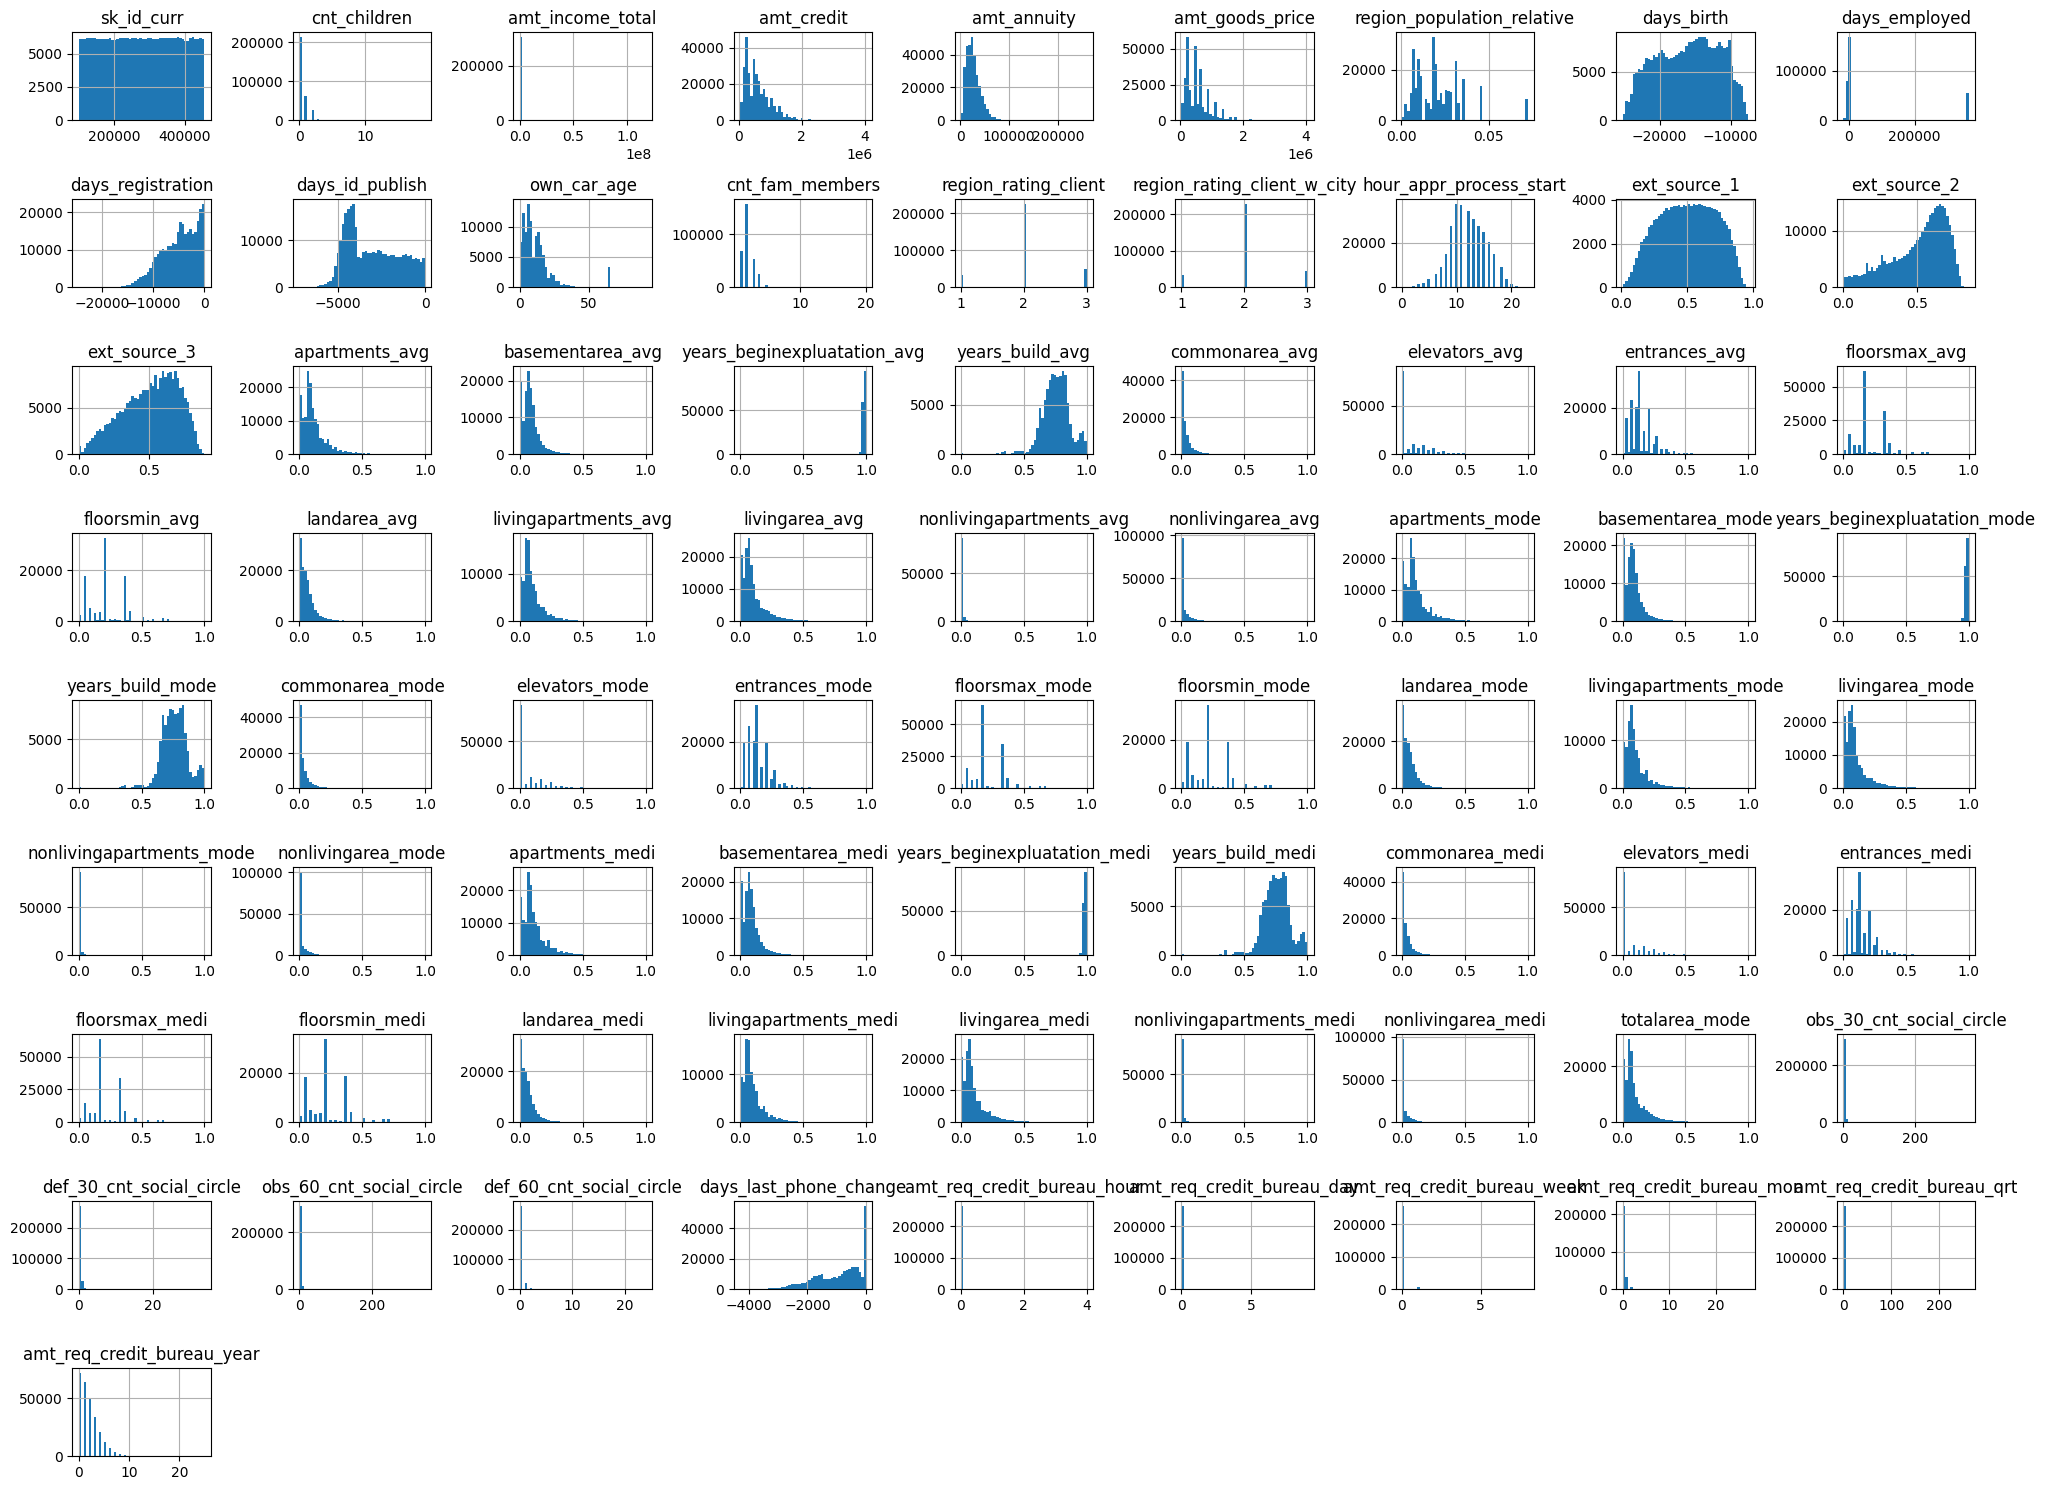

In [11]:
num_cols = train.select_dtypes('number').nunique()
# print(num_cols)
num_cols = num_cols[num_cols > 2].index.tolist()

# Now plot histograms for those columns
plt.figure(figsize=(15, 20))
train[num_cols].hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [12]:
corr = train.select_dtypes(include=["number"]).corr()["target"].sort_values(ascending=False)
print(corr.head(10))  # positively correlated with default
print(corr.tail(10))  # negatively correlated (protective)


target                         1.000000
days_birth                     0.078239
region_rating_client_w_city    0.060893
region_rating_client           0.058899
days_last_phone_change         0.055218
days_id_publish                0.051457
reg_city_not_work_city         0.050994
flag_emp_phone                 0.045982
reg_city_not_live_city         0.044395
flag_document_3                0.044346
Name: target, dtype: float64
elevators_avg                -0.034199
region_population_relative   -0.037227
amt_goods_price              -0.039645
floorsmax_mode               -0.043226
floorsmax_medi               -0.043768
floorsmax_avg                -0.044003
days_employed                -0.044932
ext_source_1                 -0.155317
ext_source_2                 -0.160472
ext_source_3                 -0.178919
Name: target, dtype: float64



Contingency Table for name_contract_type:
 target                   0      1
name_contract_type               
Cash loans          255011  23221
Revolving loans      27675   1604


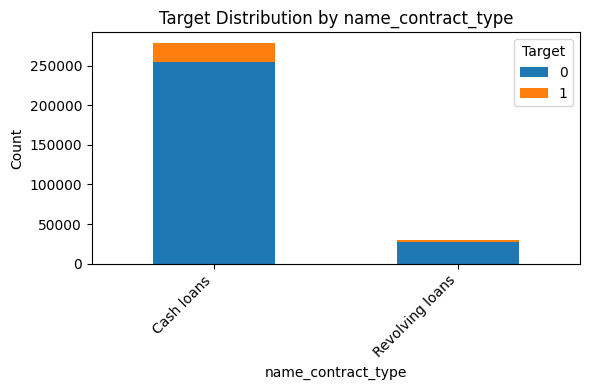


Contingency Table for code_gender:
 target            0      1
code_gender               
F            188278  14170
M             94404  10655
XNA               4      0


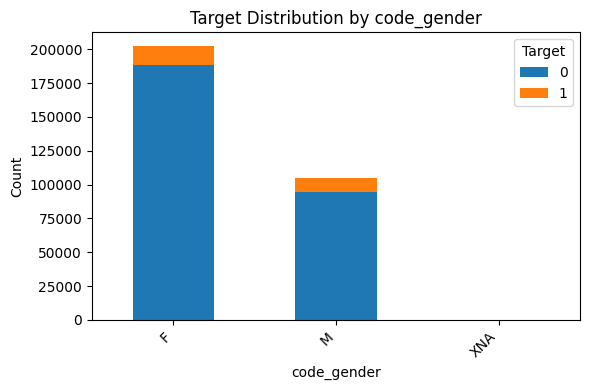


Contingency Table for flag_own_car:
 target             0      1
flag_own_car               
N             185675  17249
Y              97011   7576


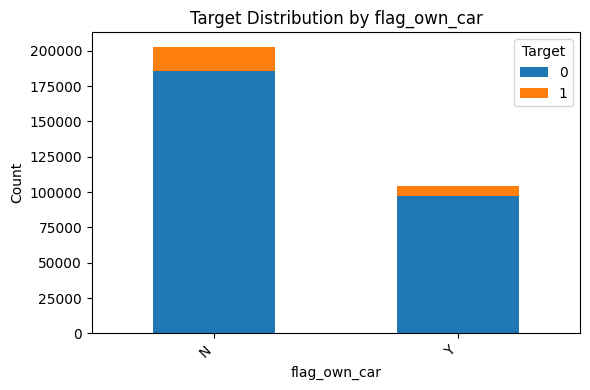


Contingency Table for flag_own_realty:
 target                0      1
flag_own_realty               
N                 86357   7842
Y                196329  16983


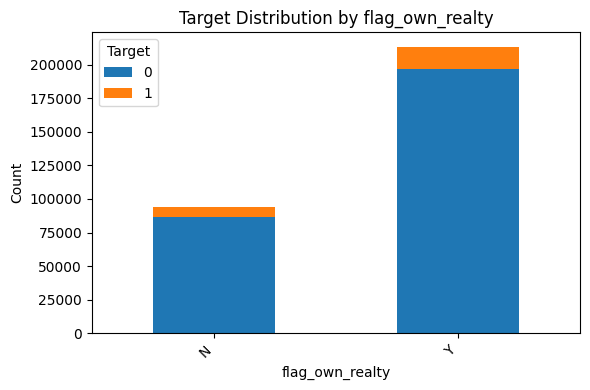


Contingency Table for name_type_suite:
 target                0      1
name_type_suite               
Children           3026    241
Family            37140   3009
Group of people     248     23
Other_A             790     76
Other_B            1596    174
Spouse, partner   10475    895
Unaccompanied    228189  20337


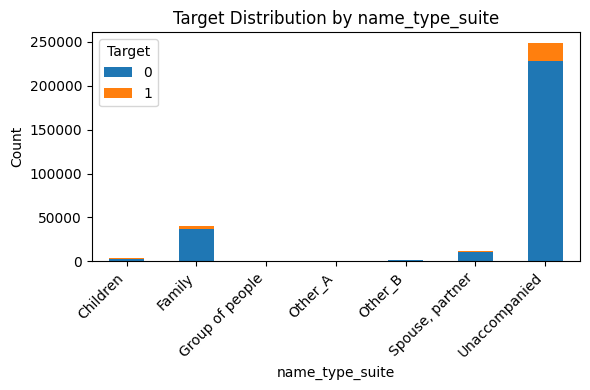


Contingency Table for name_income_type:
 target                     0      1
name_income_type                   
Businessman               10      0
Commercial associate   66257   5360
Maternity leave            3      2
Pensioner              52380   2982
State servant          20454   1249
Student                   18      0
Unemployed                14      8
Working               143550  15224


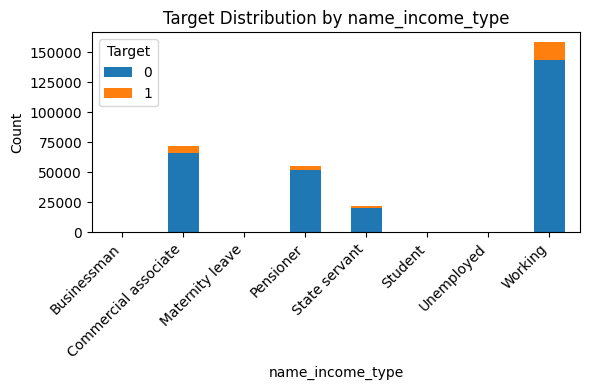


Contingency Table for name_education_type:
 target                              0      1
name_education_type                         
Academic degree                   161      3
Higher education                70854   4009
Incomplete higher                9405    872
Lower secondary                  3399    417
Secondary / secondary special  198867  19524


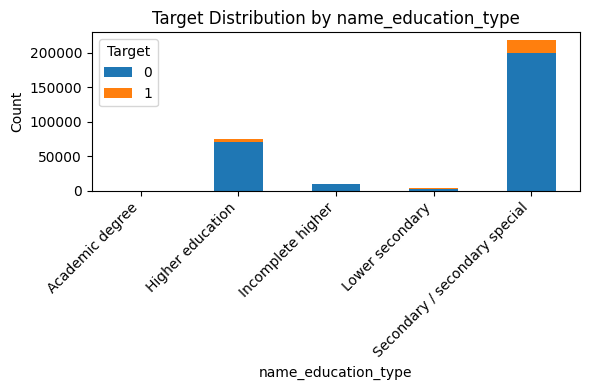


Contingency Table for name_family_status:
 target                     0      1
name_family_status                 
Civil marriage         26814   2961
Married               181582  14850
Separated              18150   1620
Single / not married   40987   4457
Unknown                    2      0
Widow                  15151    937


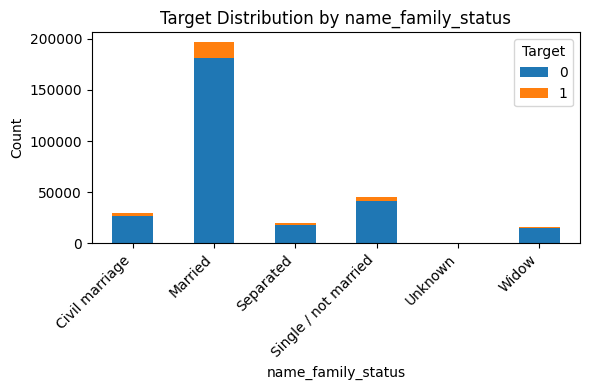


Contingency Table for name_housing_type:
 target                    0      1
name_housing_type                 
Co-op apartment        1033     89
House / apartment    251596  21272
Municipal apartment   10228    955
Office apartment       2445    172
Rented apartment       4280    601
With parents          13104   1736


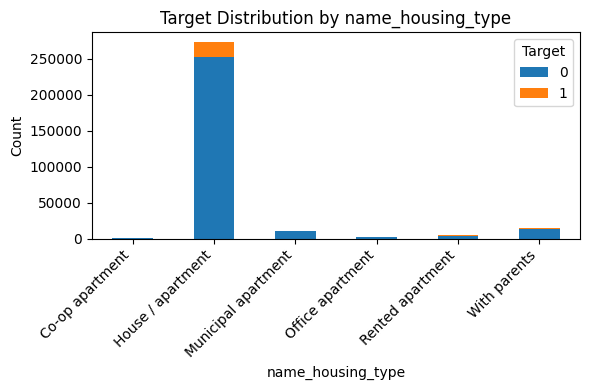


Contingency Table for occupation_type:
 target                     0     1
occupation_type                   
Accountants             9339   474
Cleaning staff          4206   447
Cooking staff           5325   621
Core staff             25832  1738
Drivers                16496  2107
HR staff                 527    36
High skill tech staff  10679   701
IT staff                 492    34
Laborers               49348  5838
Low-skill Laborers      1734   359
Managers               20043  1328
Medicine staff          7965   572
Private service staff   2477   175
Realty agents            692    59
Sales staff            29010  3092
Secretaries             1213    92
Security staff          5999   722
Waiters/barmen staff    1196   152


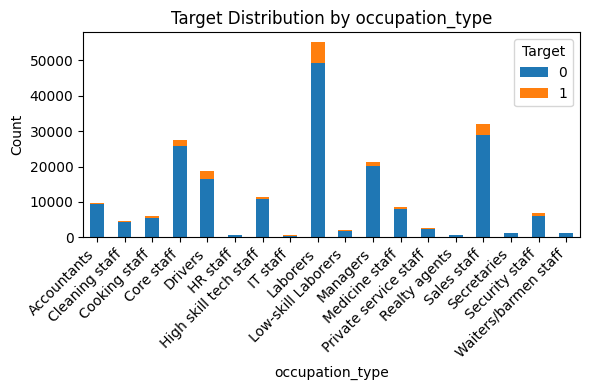


Contingency Table for weekday_appr_process_start:
 target                          0     1
weekday_appr_process_start             
FRIDAY                      46237  4101
MONDAY                      46780  3934
SATURDAY                    31182  2670
SUNDAY                      14898  1283
THURSDAY                    46493  4098
TUESDAY                     49400  4501
WEDNESDAY                   47696  4238


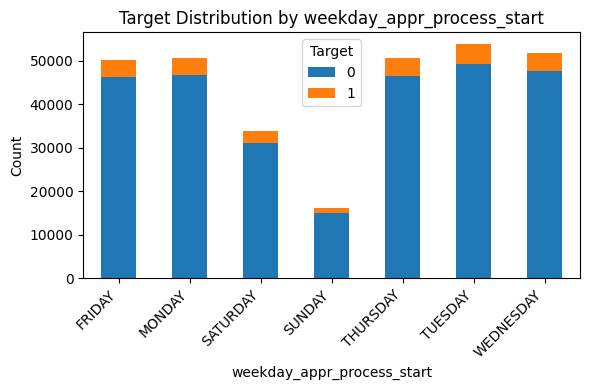


Contingency Table for organization_type:
 target                      0     1
organization_type                  
Advertising               394    35
Agriculture              2197   257
Bank                     2377   130
Business Entity Type 1   5497   487
Business Entity Type 2   9653   900
Business Entity Type 3  61669  6323
Cleaning                  231    29
Construction             5936   785
Culture                   358    21
Electricity               887    63
Emergency                 520    40
Government               9678   726
Hotel                     904    62
Housing                  2723   235
Industry: type 1          924   115
Industry: type 10         102     7
Industry: type 11        2470   234
Industry: type 12         355    14
Industry: type 13          58     9
Industry: type 2          425    33
Industry: type 3         2930   348
Industry: type 4          788    89
Industry: type 5          558    41
Industry: type 6          104     8
Industry: type 7     

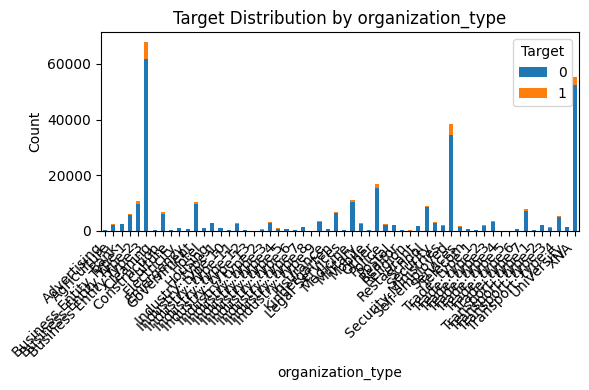


Contingency Table for fondkapremont_mode:
 target                     0     1
fondkapremont_mode                
not specified           5258   429
org spec account        5292   327
reg oper account       68678  5152
reg oper spec account  11288   792


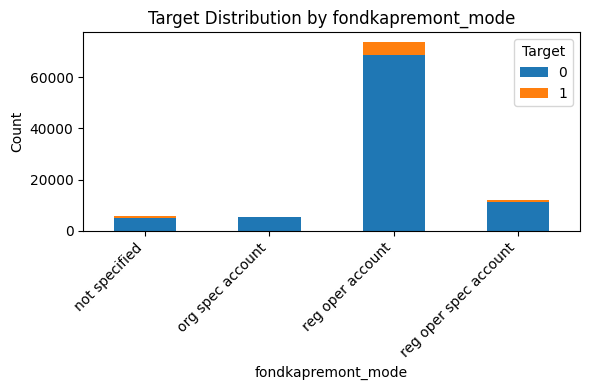


Contingency Table for housetype_mode:
 target                 0      1
housetype_mode                 
block of flats    140053  10450
specific housing    1347    152
terraced house      1109    103


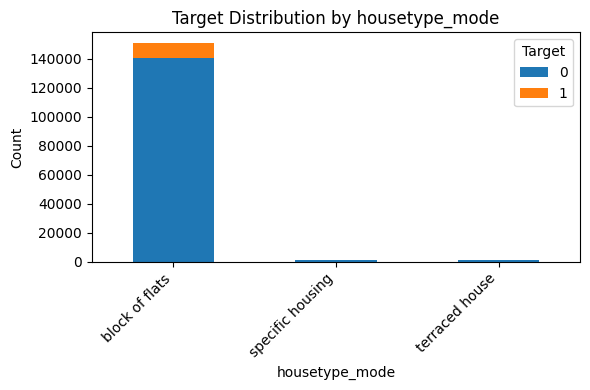


Contingency Table for wallsmaterial_mode:
 target                  0     1
wallsmaterial_mode             
Block                8603   650
Mixed                2123   173
Monolithic           1695    84
Others               1490   135
Panel               61848  4192
Stone, brick        60015  4800
Wooden               4842   520


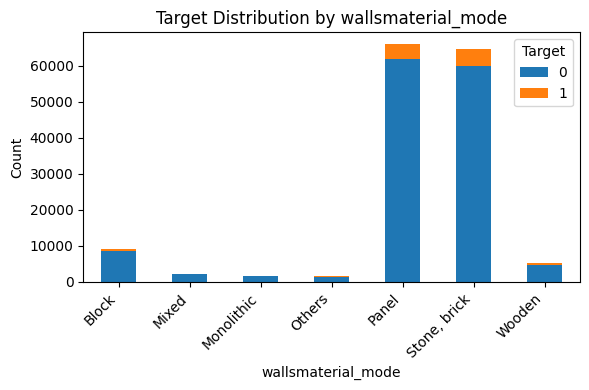


Contingency Table for emergencystate_mode:
 target                    0      1
emergencystate_mode               
No                   148324  11104
Yes                    2105    223


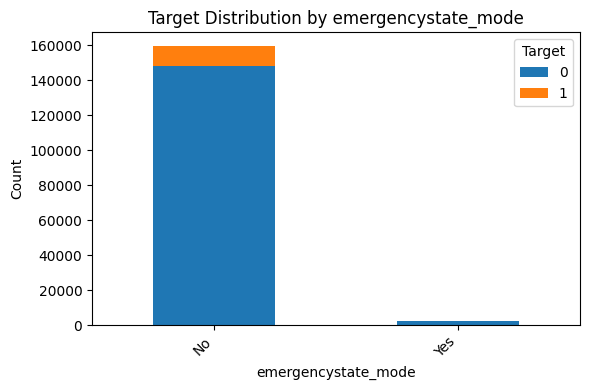

In [13]:
cat_cols = train.select_dtypes('object').columns

# 16 columns
for col in cat_cols:
    cross_tab = pd.crosstab(train[col], train['target'])
    print(f"\nContingency Table for {col}:\n", cross_tab)

    # Plot stacked bar
    cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f'Target Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target')
    plt.tight_layout()
    plt.show()

```
train['target'] = train['target'].astype(str)
for col in num_cols:
    sns.barplot(data=train, x=col, y="target")
    plt.title(f'Target Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target')
    plt.tight_layout()
    plt.show()

### Aggregating info from other datasets

In [14]:
train_original = train.copy()
train_agg = train.copy()

#### bureau_balance and bureau

In [15]:
bb = pd.read_csv("bureau_balance.csv")

In [16]:
bb["STATUS"].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

In [17]:
filtered_bb = bb[~bb["STATUS"].isin(["X","C"])]

In [18]:
most_recent_status = (
    filtered_bb
    .sort_values(by=['SK_ID_BUREAU', 'MONTHS_BALANCE'], ascending=[True, False])  # higher MONTHS_BALANCE is more recent
    .groupby('SK_ID_BUREAU')
    .first()
    .reset_index()[['SK_ID_BUREAU', 'STATUS']]
    .rename(columns={'STATUS': 'status_most_recent'})
)

In [19]:
most_recent_status = most_recent_status.astype('int')

In [20]:
most_freq_status = (
    filtered_bb
    .groupby('SK_ID_BUREAU')['STATUS']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
    .rename(columns={'STATUS': 'status_most_freq'})
)

In [21]:
most_freq_status = most_freq_status.astype('int')

In [22]:
most_freq_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687027 entries, 0 to 687026
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   SK_ID_BUREAU      687027 non-null  int64
 1   status_most_freq  687027 non-null  int64
dtypes: int64(2)
memory usage: 10.5 MB


In [23]:
b = pd.read_csv('bureau.csv')

In [24]:
b.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


In [25]:
b.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [26]:
bb_agg = b.merge(right=most_freq_status, on="SK_ID_BUREAU", how="left").merge(right=most_recent_status, on="SK_ID_BUREAU", how="left")

In [27]:
bb_agg.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,status_most_freq,status_most_recent
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN


In [28]:
bureau_agg = bb_agg.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': 'min',
    'AMT_CREDIT_MAX_OVERDUE':'max',
    'CREDIT_DAY_OVERDUE': 'mean',
    'AMT_CREDIT_SUM': 'sum',
    'AMT_CREDIT_SUM_DEBT': 'sum',
    'CNT_CREDIT_PROLONG': 'count',
    'status_most_freq':  'mean',
    'status_most_recent': 'mean'
    # Add more aggregations as needed
})

In [29]:
bureau_agg.columns = bureau_agg.columns.str.lower()

In [30]:
bureau_agg

,days_credit,amt_credit_max_overdue,credit_day_overdue,amt_credit_sum,amt_credit_sum_debt,cnt_credit_prolong,status_most_freq,status_most_recent
SK_ID_CURR,,,,,,,,
100001,-1572,NaN,0.0,1453365.000,596686.500,7,0.0,0.142857
100002,-1437,5043.645,0.0,865055.565,245781.000,8,0.5,0.500000
100003,-2586,0.000,0.0,1017400.500,0.000,4,NaN,NaN
100004,-1326,0.000,0.0,189037.800,0.000,2,NaN,NaN
100005,-373,0.000,0.0,657126.000,568408.500,3,0.0,0.000000
...,...,...,...,...,...,...,...,...
456249,-2713,18945.000,0.0,3693858.660,163071.000,13,NaN,NaN
456250,-1002,0.000,0.0,3086459.550,2232040.095,3,0.0,0.000000
456253,-919,NaN,0.0,3960000.000,1795833.000,4,0.0,0.000000


In [31]:
bureau_agg.fillna(0, inplace=True)

<Axes: >

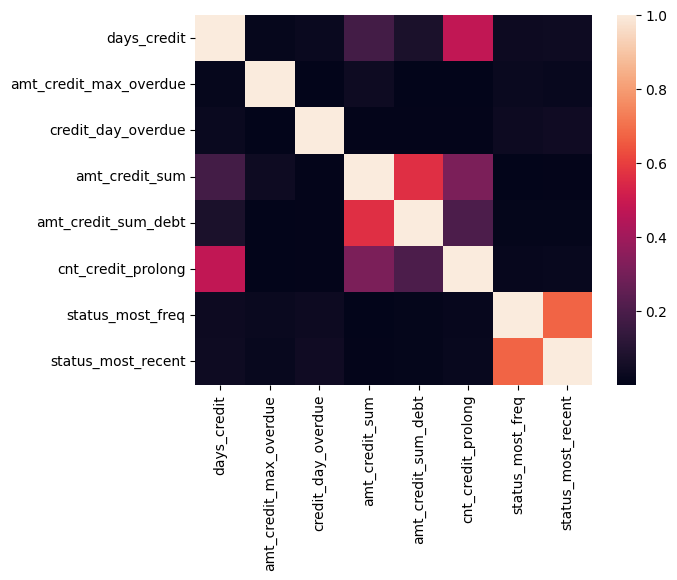

In [32]:
sns.heatmap(bureau_agg.corr().abs())

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
min_max_agg = MinMaxScaler()

In [35]:
bureau_agg2 = pd.DataFrame(min_max_agg.fit_transform(bureau_agg), columns= min_max_agg.get_feature_names_out())

In [36]:
bureau_agg2.reset_index(names="sk_id_curr", inplace=True)

In [37]:
train_agg = train_agg.merge(bureau_agg2, on='sk_id_curr', how="left")

#### POS

In [38]:
pos = pd.read_csv('POS_CASH_balance.csv')

In [39]:
pos.columns = pos.columns.str.lower()

In [40]:
pos.head(3)

,sk_id_prev,sk_id_curr,months_balance,cnt_instalment,cnt_instalment_future,name_contract_status,sk_dpd,sk_dpd_def
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


In [41]:
pos_agg = pos.groupby("sk_id_curr").agg(
    {
        "sk_id_prev" : 'count',
        "sk_dpd": 'mean'
    }
).rename(columns={'sk_id_prev':'pos_count', 'sk_dpd':'pos_dpd'})

In [42]:
pos_agg.head(3)

,pos_count,pos_dpd
sk_id_curr,,
100001,9,0.777778
100002,19,0.000000
100003,28,0.000000


In [43]:
from sklearn.preprocessing import minmax_scale

In [44]:
pos_agg['pos_count'] = minmax_scale(pos_agg['pos_count'])

In [45]:
pos_agg.isna().sum()

pos_count    0
pos_dpd      0
dtype: int64

In [46]:
train_agg = train_agg.merge(pos_agg, on="sk_id_curr", how="left")

#### credit_card_balance.csv

In [47]:
cc = pd.read_csv("credit_card_balance.csv")

In [48]:
cc.columns = cc.columns.str.lower()

In [49]:
cc.head(3)

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


* amt_drawings_current - on avg how much the user withdrawing
* amt_payment_current - on avg how much the client monthly payable
* cnt_instalment_mature_cum - on avg how many times the credit is over due

In [50]:
cc_agg = cc.groupby('sk_id_curr').agg(
    {
        'amt_drawings_current': 'mean',
        'amt_payment_current': 'mean',
        'cnt_instalment_mature_cum': 'mean'
    }
).rename(columns={'amt_drawings_current':'cc_amt_drawings_current',
                 'amt_payment_current': 'cc_amt_payment_current',
                 'cnt_instalment_mature_cum':'cc_cnt_instalment_mature_cum'})

In [51]:
cc_agg.fillna(cc_agg.mean(), inplace=True) 

In [52]:
cc_agg.columns

Index(['cc_amt_drawings_current', 'cc_amt_payment_current',
       'cc_cnt_instalment_mature_cum'],
      dtype='object')

<Axes: >

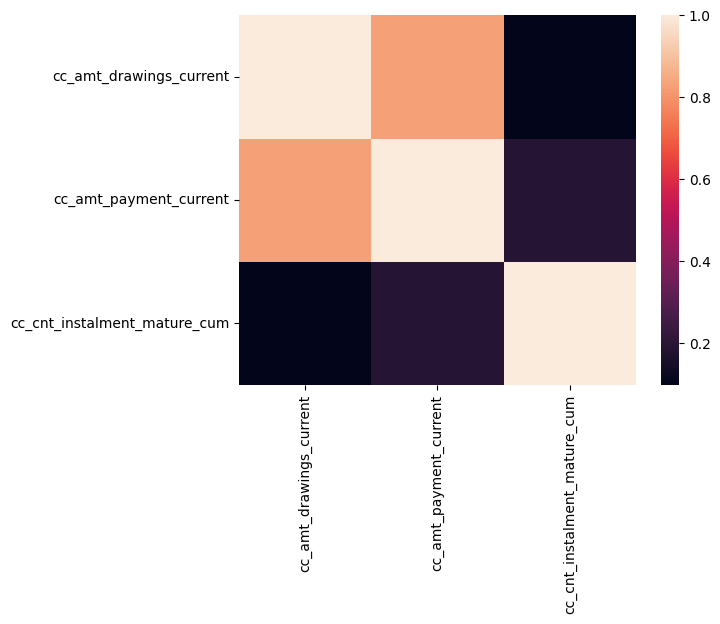

In [53]:
sns.heatmap(cc_agg.corr().abs())

In [54]:
cc_agg.drop(columns="cc_amt_payment_current", inplace=True,axis=1)

In [55]:
cc_agg = pd.DataFrame(minmax_scale(cc_agg), columns=cc_agg.columns)

In [56]:
cc_agg.reset_index(names="sk_id_curr", inplace=True)

In [57]:
train_agg = train_agg.merge(right=cc_agg, on='sk_id_curr', how='left')

#### previous_application.csv

In [58]:
pa = pd.read_csv('previous_application.csv')

In [59]:
pa.columns = pa.columns.str.lower()

In [60]:
pa.isna().sum()

sk_id_prev                           0
sk_id_curr                           0
name_contract_type                   0
amt_annuity                     372235
amt_application                      0
amt_credit                           1
amt_down_payment                895844
amt_goods_price                 385515
weekday_appr_process_start           0
hour_appr_process_start              0
flag_last_appl_per_contract          0
nflag_last_appl_in_day               0
rate_down_payment               895844
rate_interest_primary          1664263
rate_interest_privileged       1664263
name_cash_loan_purpose               0
name_contract_status                 0
days_decision                        0
name_payment_type                    0
code_reject_reason                   0
name_type_suite                 820405
name_client_type                     0
name_goods_category                  0
name_portfolio                       0
name_product_type                    0
channel_type             

In [61]:
pa['name_portfolio'].value_counts()

name_portfolio
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: count, dtype: int64

In [62]:
pa.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


* amt_credit - mean credit granted
* name_contract_status - mode - approved, refused, canceled
* name_client_type - mode - frequent loan applicant?
* name_portfolio - mode - frequent loan type

In [63]:
pa_agg = pa.groupby("sk_id_curr").agg(
    {
        'amt_credit': 'mean',
        'name_contract_status': lambda x: x.mode().iloc[0],
        'name_client_type': lambda x: x.mode().iloc[0],
        'name_portfolio': lambda x: x.mode().iloc[0]
    }
)

In [64]:
pa_agg2 = pa_agg.copy()

In [65]:
pa_agg.columns = "pa_" + pa_agg.columns

In [66]:
pa_agg.isna().sum()

pa_amt_credit              0
pa_name_contract_status    0
pa_name_client_type        0
pa_name_portfolio          0
dtype: int64

In [67]:
pa_agg

,pa_amt_credit,pa_name_contract_status,pa_name_client_type,pa_name_portfolio
sk_id_curr,,,,
100001,23787.00,Approved,Refreshed,POS
100002,179055.00,Approved,New,POS
100003,484191.00,Approved,Refreshed,POS
100004,20106.00,Approved,New,POS
100005,20076.75,Approved,New,POS
...,...,...,...,...
456251,40455.00,Approved,New,POS
456252,56821.50,Approved,New,POS
456253,20625.75,Approved,Refreshed,POS


In [68]:
pa_agg['pa_name_portfolio'].value_counts()

pa_name_portfolio
POS      192341
Cash      85974
XNA       36193
Cards     24246
Cars        103
Name: count, dtype: int64

In [69]:
pa_agg['pa_amt_credit'] = minmax_scale(pa_agg['pa_amt_credit'])

In [70]:
pa_agg = pd.get_dummies(pa_agg, columns=['pa_name_portfolio','pa_name_contract_status','pa_name_client_type'])

In [71]:
pa_agg

,pa_amt_credit,pa_name_portfolio_Cards,pa_name_portfolio_Cars,pa_name_portfolio_Cash,pa_name_portfolio_POS,pa_name_portfolio_XNA,pa_name_contract_status_Approved,pa_name_contract_status_Canceled,pa_name_contract_status_Refused,pa_name_contract_status_Unused offer,pa_name_client_type_New,pa_name_client_type_Refreshed,pa_name_client_type_Repeater,pa_name_client_type_XNA
sk_id_curr,,,,,,,,,,,,,,
100001,0.005873,False,False,False,True,False,True,False,False,False,False,True,False,False
100002,0.044211,False,False,False,True,False,True,False,False,False,True,False,False,False
100003,0.119553,False,False,False,True,False,True,False,False,False,False,True,False,False
100004,0.004964,False,False,False,True,False,True,False,False,False,True,False,False,False
100005,0.004957,False,False,False,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0.009989,False,False,False,True,False,True,False,False,False,True,False,False,False
456252,0.014030,False,False,False,True,False,True,False,False,False,True,False,False,False
456253,0.005093,False,False,False,True,False,True,False,False,False,False,True,False,False


In [72]:
pa_agg.reset_index()

,sk_id_curr,pa_amt_credit,pa_name_portfolio_Cards,pa_name_portfolio_Cars,pa_name_portfolio_Cash,pa_name_portfolio_POS,pa_name_portfolio_XNA,pa_name_contract_status_Approved,pa_name_contract_status_Canceled,pa_name_contract_status_Refused,pa_name_contract_status_Unused offer,pa_name_client_type_New,pa_name_client_type_Refreshed,pa_name_client_type_Repeater,pa_name_client_type_XNA
0,100001,0.005873,False,False,False,True,False,True,False,False,False,False,True,False,False
1,100002,0.044211,False,False,False,True,False,True,False,False,False,True,False,False,False
2,100003,0.119553,False,False,False,True,False,True,False,False,False,False,True,False,False
3,100004,0.004964,False,False,False,True,False,True,False,False,False,True,False,False,False
4,100005,0.004957,False,False,False,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,0.009989,False,False,False,True,False,True,False,False,False,True,False,False,False
338853,456252,0.014030,False,False,False,True,False,True,False,False,False,True,False,False,False
338854,456253,0.005093,False,False,False,True,False,True,False,False,False,False,True,False,False
338855,456254,0.033195,False,False,False,True,False,True,False,False,False,True,False,False,False


In [73]:
train_agg = train_agg.merge(right=pa_agg, on='sk_id_curr', how = 'left')

#### installments_payments.csv

In [74]:
ip = pd.read_csv('installments_payments.csv')

In [75]:
ip.columns = ip.columns.str.lower()

In [76]:
ip.head(3)

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


In [77]:
ip['payment_delay'] = ip['days_entry_payment'] - ip['days_instalment']
ip['payment_diff'] = ip['amt_payment'] - ip['amt_instalment']

In [78]:
ip_agg = ip.groupby('sk_id_curr').agg({
    'payment_delay': ['mean', 'max'],
    'payment_diff': ['mean', 'min'],
    'amt_payment': 'sum',
    'amt_instalment': 'sum'
})

In [79]:
ip_agg.columns = ['_'.join(col).strip() for col in ip_agg.columns]


<Axes: >

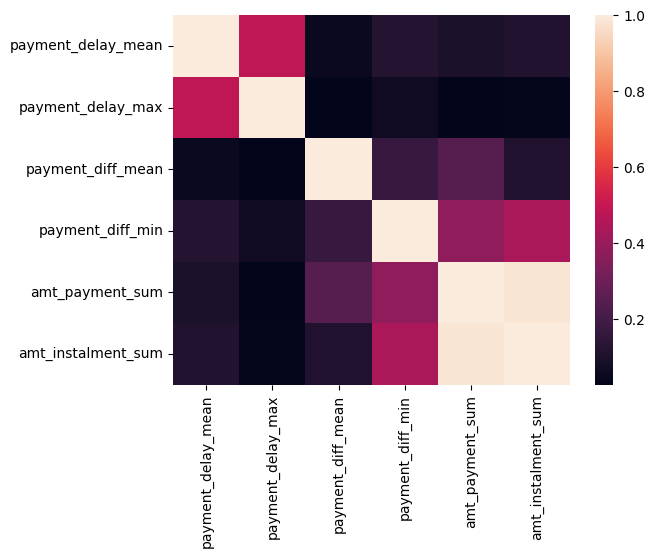

In [80]:
sns.heatmap(ip_agg.corr().abs())

In [81]:
ip_agg.drop(columns="amt_instalment_sum", inplace=True, axis=1)

In [82]:
ip_agg = pd.DataFrame(minmax_scale(ip_agg), columns=ip_agg.columns)

In [83]:
ip_agg.reset_index(names="sk_id_curr", inplace=True)

In [84]:
train_agg = train_agg.merge(right=ip_agg, on="sk_id_curr", how="left")

#### New feature

In [85]:
train_agg['credit_to_income'] = train_agg['amt_credit'] / train_agg['amt_income_total']
train['annuity_to_monthly_income'] = train_agg['amt_annuity'] / (train_agg['amt_income_total'] / 12.0)
train_agg['coods_price_to_credit'] = train_agg['amt_goods_price'] / train_agg['amt_credit']
train_agg['income_to_fam'] = train_agg['amt_income_total'] / train_agg['cnt_fam_members']
train_agg['emp_to_birth'] = train_agg['days_employed'] / train_agg['days_birth']
train_agg['credit_to_income'] = train_agg['amt_credit'] / train_agg['amt_income_total']
train_agg['area_to_fam'] = train_agg['totalarea_mode'] / train_agg['cnt_fam_members']
train_agg['remaining_credit'] = train_agg['amt_credit_sum'] - train_agg["amt_credit_sum_debt"] 
train_agg['total_missing_values_in_row'] = train_agg.isna().sum(axis=1)


### Data Preprocessing

#### Approach:
Preprocessing is not applied on aggregated data from other datasets, because -
1. They are already processed.
2. <b>The pipeline built to preprocess training set is also used to preprocess test dataset.<b/>
* numeric col:
  1. for columns having like mean, median and mode, consider only mean. Drop median and mode
  2. check and drop corelated columns ( for tree models, do not drop these columns)
  3. Fill na with mean

* cat cols
1. nominal
 - fill na
 - encode
2. ordinal
 - filla na
 - custom encode
3. target
 - fill na
 - encode
        



  3. fill na with mode
  4. segregate nominal, ordinal and target cols
  5. custom encode or frequency encode ordinal columns

* scale down numeric columns and freqency enc cols

In [86]:
nunique_num = train_original.select_dtypes("number").nunique()

In [87]:
one_hot_cols = nunique_num[nunique_num==2].index.to_list()
print(len(one_hot_cols))

33


In [88]:
num_cols = train_original.select_dtypes(include="number").columns.to_list()
num_cols = [ele for ele in num_cols if ele not in one_hot_cols]
print(len(num_cols))

73


In [89]:
drop_cols = [col for col in num_cols if col.endswith(('mode','medi'))] + ['sk_id_curr']
num_cols2 = [col for col in num_cols if not col.endswith(('mode','medi'))]

In [90]:
num_cols2.remove('sk_id_curr')

In [91]:
train2 = train_original.copy()

In [92]:
train2.drop(columns=drop_cols, inplace=True, axis=1)

In [93]:
corr_matrix = train2[num_cols2].corr().abs()

In [94]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [95]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [96]:
high_corr_pairs = (
    corr_matrix.where(~mask)
    .stack()
    .reset_index()
)

In [97]:
high_corr_pairs

,level_0,level_1,0
0,amt_income_total,cnt_children,0.012882
1,amt_credit,cnt_children,0.002145
2,amt_credit,amt_income_total,0.156870
3,amt_annuity,cnt_children,0.021374
4,amt_annuity,amt_income_total,0.191657
...,...,...,...
898,amt_req_credit_bureau_year,amt_req_credit_bureau_hour,0.004597
899,amt_req_credit_bureau_year,amt_req_credit_bureau_day,0.003355
900,amt_req_credit_bureau_year,amt_req_credit_bureau_week,0.018917
901,amt_req_credit_bureau_year,amt_req_credit_bureau_mon,0.004975


In [98]:
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

In [99]:
threshold = 0.8
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold].sort_values(by='Correlation', ascending=False)

print(high_corr_pairs)

                        Feature1                  Feature2  Correlation
593     obs_60_cnt_social_circle  obs_30_cnt_social_circle     0.998490
8                amt_goods_price                amt_credit     0.986968
90   region_rating_client_w_city      region_rating_client     0.950842
396         livingapartments_avg            apartments_avg     0.943952
424               livingarea_avg            apartments_avg     0.913619
434               livingarea_avg      livingapartments_avg     0.880798
55               cnt_fam_members              cnt_children     0.879161
429               livingarea_avg             elevators_avg     0.867776
628     def_60_cnt_social_circle  def_30_cnt_social_circle     0.860517
271                elevators_avg            apartments_avg     0.836958
401         livingapartments_avg             elevators_avg     0.811786


In [100]:
drop_cols_high_corr = high_corr_pairs.Feature1.to_list()

In [101]:
num_cols3 = [ele for ele in num_cols2 if ele not in drop_cols_high_corr]

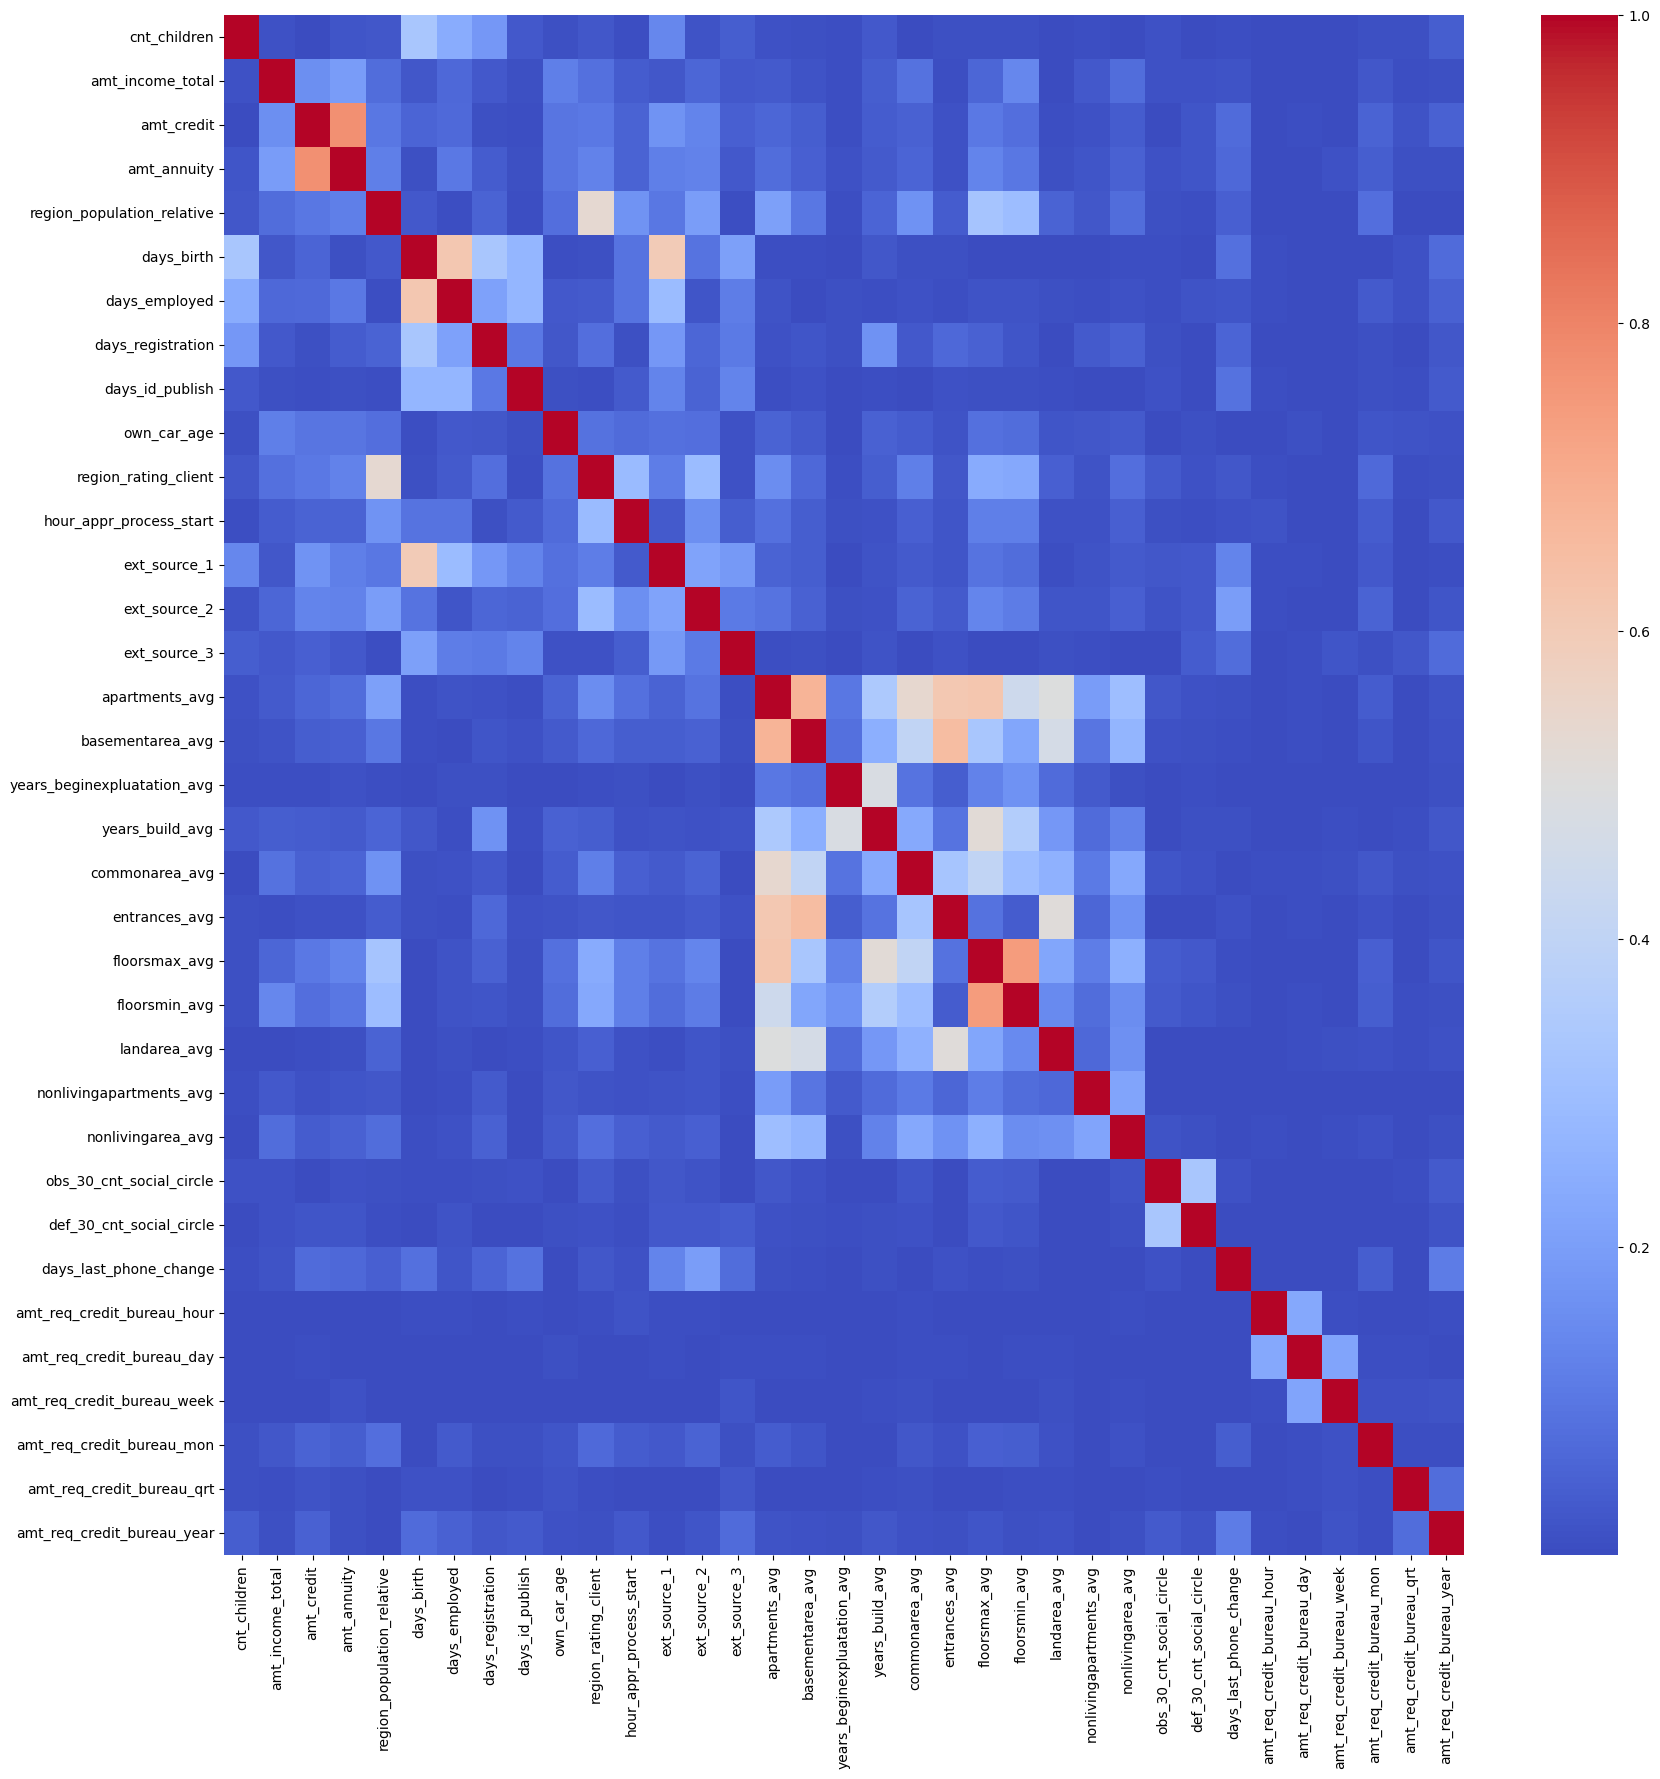

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(train2[num_cols3].corr().abs(),cmap='coolwarm')
plt.show();

In [103]:
cat_cols = train_original.select_dtypes(include="object").columns

In [104]:
train_original[cat_cols].nunique()

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

In [105]:
pd.crosstab(train_original['name_housing_type'], train_original['target'], normalize=True).sort_values(1, ascending=False)

target,0,1
name_housing_type,,
House / apartment,0.818169,0.069175
With parents,0.042613,0.005645
Municipal apartment,0.033261,0.003106
Rented apartment,0.013918,0.001954
Office apartment,0.007951,0.000559
Co-op apartment,0.003359,0.000289


In [106]:
for col in cat_cols:
    print(col.strip(),"--", train_original[col].unique())

name_contract_type -- ['Cash loans' 'Revolving loans']
code_gender -- ['M' 'F' 'XNA']
flag_own_car -- ['N' 'Y']
flag_own_realty -- ['Y' 'N']
name_type_suite -- ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
name_income_type -- ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
name_education_type -- ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
name_family_status -- ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
name_housing_type -- ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
occupation_type -- ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/bar

In [107]:
one_hot_cols

['target',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'flag_document_2',
 'flag_document_3',
 'flag_document_4',
 'flag_document_5',
 'flag_document_6',
 'flag_document_7',
 'flag_document_8',
 'flag_document_9',
 'flag_document_10',
 'flag_document_11',
 'flag_document_12',
 'flag_document_13',
 'flag_document_14',
 'flag_document_15',
 'flag_document_16',
 'flag_document_17',
 'flag_document_18',
 'flag_document_19',
 'flag_document_20',
 'flag_document_21']

In [108]:
nominal_cols = ['name_contract_type', 'code_gender','flag_own_car',
                'flag_own_realty', 'weekday_appr_process_start','housetype_mode', 
                'emergencystate_mode']

In [109]:
ordinal_cols = ["name_type_suite",'name_income_type','name_education_type','name_family_status','fondkapremont_mode']

In [110]:
freq_enc_cols = ['name_housing_type', 'organization_type','occupation_type', 'wallsmaterial_mode']

In [111]:
len(cat_cols) == len(nominal_cols + ordinal_cols + freq_enc_cols)

True

#### num cols

In [112]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline, FunctionTransformer
from imblearn.pipeline import Pipeline as ImbPipeline


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [113]:
pipe_num_cols = Pipeline([("fill_na", SimpleImputer()), ("scaledown",MinMaxScaler())])

#### cat cols

In [114]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [115]:
# Nominal 
pipe_nominal = Pipeline([('fill_na',  SimpleImputer(strategy='most_frequent')),
                         ("impute", OneHotEncoder())])

In [116]:
ordinal_enc = [
    ('Unaccompanied', 'Other_A', 'Other_B', 'Spouse, partner', 'Family', 'Children', 'Group of people'),
    ('Unemployed', 'Student', 'Maternity leave','Pensioner','Working','State servant','Commercial associate',  'Businessman'),
    ('Lower secondary', 'Secondary / secondary special','Incomplete higher', 'Higher education', 'Academic degree'),
    ('Unknown','Separated', 'Widow', 'Single / not married','Civil marriage','Married'  ),
    ('not specified','reg oper account', 'reg oper spec account', 'org spec account' )
]

In [117]:
#ordinal
pipe_ordinal = Pipeline([("fill_na", SimpleImputer(strategy="most_frequent")),
                        ("impute", OrdinalEncoder(categories=ordinal_enc))])

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.freq_maps = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=self.columns)  # force DataFrame with proper col names
        for col in self.columns:
            self.freq_maps[col] = X[col].value_counts(normalize=True)
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.columns)  # again, force DataFrame
        out = pd.DataFrame()
        for col in self.columns:
            out[col + '_freq'] = X[col].map(self.freq_maps[col]).fillna(0)
        return out  # this is what ColumnTransformer will collect

    def get_feature_names_out(self, input_features=None):
        return [col + '_freq' for col in self.columns]

In [119]:
pipe_freq = Pipeline([("fill_na", SimpleImputer(strategy="most_frequent")),
                        ("impute", FrequencyEncoder(columns=freq_enc_cols))])

In [120]:
ctrans_all_col = ColumnTransformer([
    ("drop cols", 'drop', drop_cols + drop_cols_high_corr),
    ("numeric", pipe_num_cols, num_cols3),
    ("nominal", pipe_nominal, nominal_cols),
    ("ordinal", pipe_ordinal, ordinal_cols),
    ("freq", pipe_freq, freq_enc_cols),
    # ('impute_one_hot_cols', SimpleImputer(strategy="most_frequent"), one_hot_cols)
], remainder= Pipeline([("imputer",  SimpleImputer(strategy="most_frequent")),
                        ("scale down", MinMaxScaler())]))

### Handle Outliers

In [121]:
from scipy.stats import skew
class HandleOutliers:
    mean=std_dev=q1=q2=q3=iqr=lower_limit=upper_limit=outlier_cnt=data_cnt=outlier_percent=skew_val=0
    isSkewed=False

    def is_data_skewed(self, data, col, threshold=0.5):
        self.skew_val = skew(data[col], nan_policy='omit')
        return abs(self.skew_val) > threshold
    
    def calculate_outliers(self, data, col):
        self.isSkewed = self.is_data_skewed(data, col, 0.5)
        if self.isSkewed==True: # use IQR
            self.q2=data[col].dropna().median()
            self.q1=np.quantile(data[col].dropna(), 0.25)
            self.q3=np.quantile(data[col].dropna(), 0.75)
            self.iqr = self.q3-self.q1
            self.lower_limit = max(self.q1 - 1.5*self.iqr, data[col].min())
            self.upper_limit = min(self.q3 + 1.5*self.iqr, data[col].max())

        else: # use 3-sigma
            self.mean = data[col].dropna().mean()
            self.std_dev = data[col].dropna().std()
            self.lower_limit = max(self.mean - 3*self.std_dev, data[col].min())
            self.upper_limit = min(self.mean + 3*self.std_dev, data[col].max())

        outliers = data.loc[(data[col]<self.lower_limit) | (data[col]>self.upper_limit),col]
        self.outlier_cnt = len(outliers)
        self.data_cnt = len(data)
        self.outlier_percent = self.outlier_cnt/self.data_cnt*100
        self.print_outlier_info()



    def print_outlier_info(self):
        print("is skewed = {} | skew_val = {}".format(self.isSkewed, self.skew_val))
        if self.isSkewed:
            print("mean={} | q1={} | q2={} | q3={}".format(self.mean,self.q1,self.q2,self.q3))
            print("iqr={} | LL={} | UL={}".format(self.iqr,self.lower_limit,self.upper_limit))
            print("outlier count={} | data count={} | percent={}".format(self.outlier_cnt,self.data_cnt,self.outlier_percent))
        else:
            print("mean={} | std-dev={} | lower limit={} | upper limit={}".format(self.mean, self.std_dev, self.lower_limit, self.upper_limit))
            print("outlier count={} | outlier % = {}".format(self.outlier_cnt, self.outlier_percent))

    def fix_outlier(self, data, col):
        if self.isSkewed:
            data.loc[(data[col] < self.lower_limit) | (data[col] > self.upper_limit), col] = self.q2
        else:
            data.loc[(data[col] < self.lower_limit) | (data[col] > self.upper_limit), col] = self.mean


In [122]:
len(num_cols3)

ho = HandleOutliers()

for col in num_cols3:
    ho.calculate_outliers(train_agg,col)
    ho.fix_outlier(train_agg, col)
    

is skewed = True | skew_val = 1.9745948378093714
mean=0 | q1=0.0 | q2=0.0 | q3=1.0
iqr=1.0 | LL=0 | UL=2.5
outlier count=4272 | data count=307511 | percent=1.3892185970583166
is skewed = True | skew_val = 391.55774412283097
mean=0 | q1=112500.0 | q2=147150.0 | q3=202500.0
iqr=90000.0 | LL=25650.0 | UL=337500.0
outlier count=14035 | data count=307511 | percent=4.564064374932929
is skewed = True | skew_val = 1.234772474032497
mean=0 | q1=270000.0 | q2=513531.0 | q3=808650.0
iqr=538650.0 | LL=45000.0 | UL=1616625.0
outlier count=6562 | data count=307511 | percent=2.13390740493836
is skewed = True | skew_val = 1.5797696575947042
mean=0 | q1=16524.0 | q2=24903.0 | q3=34596.0
iqr=18072.0 | LL=1615.5 | UL=61704.0
outlier count=7504 | data count=307511 | percent=2.4402379101885785
is skewed = True | skew_val = 1.4880012623794292
mean=0 | q1=0.010006 | q2=0.01885 | q3=0.028663
iqr=0.018657 | LL=0.00029 | UL=0.056648500000000004
outlier count=8412 | data count=307511 | percent=2.735511900387303


### X,y split

In [123]:
from sklearn.model_selection import train_test_split

x = train_agg.drop(columns=['target'], axis=1)
y = train_agg['target'].astype("category")

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)

### Build pipeline - colTransfer + smote + model + train + predict 

In [124]:
from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.dummy import DummyClassifier

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, classification_report, recall_score
import time

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.svm import SVC, LinearSVC

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.neural_network import MLPClassifier

In [126]:
from collections import Counter
Counter(y_train)

Counter({0: 226148, 1: 19860})

In [127]:
scale_pos_weight = 226148/19860

In [128]:
scale_pos_weight

11.38710976837865

In [129]:
params = {
    "logistic": {"model":[LogisticRegression(class_weight="balanced")]},
    "RidgeClassifier": {"model":[RidgeClassifier(class_weight="balanced")]},
    "DecisionTreeClassifier": {"model":[DecisionTreeClassifier(class_weight="balanced")]},
    "RandomForestClassifier": {"model":[RandomForestClassifier(class_weight="balanced")]},
    "ExtraTreesClassifier": {"model":[ExtraTreesClassifier(n_jobs=-1, class_weight='balanced')]},
    "LGBMClassifier": {"model":[LGBMClassifier(class_weight="balanced", device='gpu')]},
    # "GradientBoostingClassifier": {"model":[GradientBoostingClassifier()]}, # Dosent support class_weight="balanced"
    "XGBClassifier": {"model":[XGBClassifier(scale_pos_weight = scale_pos_weight)]},
    "CatBoostClassifier": {"model":[CatBoostClassifier(auto_class_weights ='Balanced')]},
    # "SVC": {"model":[SVC(class_weight='balanced')]},
    # "MLPClassifier": {"model":[MLPClassifier()]}, # Dosent support class_weight="balanced"
}

In [130]:
pipeline = imb_pipeline([("col transform", ctrans_all_col),
                     # ("SMOTE", SMOTE(n_jobs=-1)),
                        ('model', DummyClassifier())])

In [131]:
result = []
for model_name, model_params in params.items():
    gcv = GridSearchCV(pipeline, param_grid=model_params, scoring='recall', n_jobs=-1, cv=2)
    
    gcv.fit(x_train, y_train)
    
    pred_train = gcv.predict(x_train)
    pred_test = gcv.predict(x_test)

    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)

    precision_train = precision_score(y_train, pred_train)
    precision_test = precision_score(y_test, pred_test)

    recall_train = recall_score(y_train, pred_train)
    recall_test = recall_score(y_test, pred_test)

    accuracy_score_train = accuracy_score(y_train, pred_train)
    accuracy_score_test = accuracy_score(y_test, pred_test)
    report = {
        "model": model_name,
        "train time": gcv.refit_time_,
        "f1_train": f1_train,
        "f1_test": f1_test,
        'recall_train':recall_train,
        'recall_test':recall_test,
        "precision_train": precision_train,
        "precision_test": precision_test,
        'accuracy_score_train': accuracy_score_train,
        'accuracy_score_test': accuracy_score_test
    }
    result.append(report)
    print(report)
    print(model_name)
    print(classification_report(y_test, pred_test))

{'model': 'logistic', 'train time': 15.212442398071289, 'f1_train': 0.2586469646405216, 'f1_test': 0.25770501883022057, 'recall_train': 0.6751258811681773, 'recall_test': 0.6753272910372609, 'precision_train': 0.15996563983869813, 'precision_test': 0.15923445884978868, 'accuracy_score_train': 0.6875630060811031, 'accuracy_score_test': 0.6859340194787246}
logistic
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.68      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503

{'model': 'RidgeClassifier', 'train time': 8.378873586654663, 'f1_train': 0.26063907825627686, 'f1_test': 0.26133749268863327, 'recall_train': 0.6708962739174219, 'recall_test': 0.6749244712990936, 'precision_train': 0.16173632269576724, 'precision_test': 0.16204061895551258, 'accuracy_score_train': 0.6927

In [132]:
result_df = pd.DataFrame(result)

Trying different combinations of smote, class_weight :
| Config                            | F1 (test) | Recall (test) | Precision (test) | Accuracy | Verdict                     |
| --------------------------------- | --------- | ------------- | ---------------- | -------- | --------------------------- |
| SMOTE + `class_weight='balanced'` | **0.018** | 0.009         | 0.418            | 91.9%    | ❌ **Worst** — model is lost |
| `class_weight='balanced'` only    | **0.272** | 0.672         | 0.170            | 70.9%    | ✅ **Best performer**        |
| SMOTE only                        | **0.021** | 0.010         | 0.427            | 91.9%    | ❌ Also bad — same as above  |

* As per above table, using class_weight="balanced" without applyting smote


In [133]:
result_df.sort_values(by=["recall_test", "f1_test","accuracy_score_test", "train time"], ascending=False)

,model,train time,f1_train,f1_test,recall_train,recall_test,precision_train,precision_test,accuracy_score_train,accuracy_score_test
0,logistic,15.212442,0.258647,0.257705,0.675126,0.675327,0.159966,0.159234,0.687563,0.685934
1,RidgeClassifier,8.378874,0.260639,0.261337,0.670896,0.674924,0.161736,0.162041,0.692721,0.691999
5,LGBMClassifier,10.265311,0.294366,0.270153,0.731571,0.674320,0.184252,0.168912,0.716855,0.705868
6,XGBClassifier,9.987854,0.366434,0.275133,0.811682,0.605237,0.236631,0.178032,0.773410,0.742549
7,CatBoostClassifier,61.001169,0.395002,0.285455,0.840534,0.603021,0.258162,0.186985,0.792141,0.756288
2,DecisionTreeClassifier,27.157568,1.000000,0.148638,1.000000,0.153877,1.000000,0.143744,1.000000,0.857698
3,RandomForestClassifier,116.585353,0.999748,0.005215,0.999496,0.002618,1.000000,0.619048,0.999959,0.919354
4,ExtraTreesClassifier,34.317757,1.000000,0.002814,1.000000,0.001410,1.000000,0.700000,1.000000,0.919337


LGBMClassifier

              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56538
           1       0.17      0.67      0.27      4965

    accuracy                           0.71     61503
   macro avg       0.57      0.69      0.54     61503
   
weighted avg       0.90      0.71      0.77     61503

Our air is to identify more number of people who will default the loan. 

So more preiority is given to avoid False positive (recall).

Order of importance - recall -> f1 -> accuracy -> time

#### Trying MLPClassifier algorithm

In [134]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),   # 2 hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0001,                   # L2 penalty (regularization)
    learning_rate='adaptive',      # Reduce LR on plateau
    max_iter=200,
    early_stopping=True,           # Stop when validation score stops improving
    validation_fraction=0.1,
    random_state=42
)

In [135]:
mlp_pipe = imb_pipeline([("col trans", ctrans_all_col),
                     ("smote", SMOTE()),
                    ("model", mlp_model)])

In [136]:
from sklearn.utils.class_weight import compute_sample_weight

In [137]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [138]:
mlp_pipe.fit(x_train, y_train)


Pipeline(steps=[('col trans',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('scale down',
                                                              MinMaxScaler())]),
                                   transformers=[('drop cols', 'drop',
                                                  ['apartments_mode',
                                                   'basementarea_mode',
                                                   'years_beginexpluatation_mode',
                                                   'years_build_mode',
                                                   'commonarea_mode',
                                                   'elevators_mode',
                                                   'entrances_mode',
                                                   'floorsmax_mode',
                                                   'flo...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('impute',
                                                                   FrequencyEncoder(columns=['name_housing_type',
                                                                                             'organization_type',
                                                                                             'occupation_type',
                                                                                             'wallsmaterial_mode']))]),
                                                  ['name_housing_type',
                                                   'organization_type',
                                                   'occupation_type',
                                                   'wallsmaterial_mode'])])),
                ('smote', SMOTE()),
                ('model',
                 MLPClassifier(early_stopping=True,
                               hidden_layer_sizes=(100, 50),
                               learning_rate='adaptive', random_state=42))])

In [139]:
mlp_pred_test = mlp_pipe.predict(x_test)
mlp_pred_train = mlp_pipe.predict(x_train)

In [140]:
print(recall_score(y_train, mlp_pred_train))
print(recall_score(y_test, mlp_pred_test))

print(precision_score(y_train, mlp_pred_train))
print(precision_score(y_test, mlp_pred_test))

print(accuracy_score(y_train, mlp_pred_train))
print(accuracy_score(y_test, mlp_pred_test))

print(f1_score(y_train, mlp_pred_train))
print(f1_score(y_test, mlp_pred_test))

0.33313192346424975
0.2362537764350453
0.2859241972427503
0.19154147615937295
0.8789998699229293
0.8578443327967742
0.3077280866996907
0.21156100640274145


MLPC Dosent perform well

#### LGBMClassifier parameter tuening

In [141]:
lgbm_params = {
    'boosting_type': ['gbdt','dart', 'rf'],
    'num_leaves': [15,50,100],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [80,120],
    'max_depth': [-1,10,50,80],
    'min_child_samples': [10,30],
    'class_weight': ['balanced'],
    'importance_type': ['split', 'gain']
}

In [142]:
lgbm_params2 = {
    'num_leaves': [31, 35, 28],
    'n_estimators': [70,80, 90],
    'max_depth': [-1,35,40,45],
    'objective': ["binary"],
    'min_child_samples': [35,45],
    'class_weight': ['balanced'],
    'importance_type': ['gain']
}

In [143]:
from sklearn.model_selection import RandomizedSearchCV

In [144]:
gcv_lgb = RandomizedSearchCV(LGBMClassifier(device='gpu'), param_distributions= lgbm_params2,n_iter= 100, scoring="recall", cv=4, n_jobs=-1, verbose=2)

In [145]:
lgb_pipe = Pipeline([("col trans", ctrans_all_col),
                    ('gcv_lgb', gcv_lgb)])

In [146]:
lgb_pipe.fit(x_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 10595
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 122
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 54 dense feature groups (13.14 MB) transferred to GPU in 0.015945 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('col trans',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('scale down',
                                                              MinMaxScaler())]),
                                   transformers=[('drop cols', 'drop',
                                                  ['apartments_mode',
                                                   'basementarea_mode',
                                                   'years_beginexpluatation_mode',
                                                   'years_build_mode',
                                                   'commonarea_mode',
                                                   'elevators_mode',
                                                   'entrances_mode',
                                                   'floorsmax_mode',
                                                   'flo...
                                                   'wallsmaterial_mode'])])),
                ('gcv_lgb',
                 RandomizedSearchCV(cv=4,
                                    estimator=LGBMClassifier(device='gpu'),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'class_weight': ['balanced'],
                                                         'importance_type': ['gain'],
                                                         'max_depth': [-1, 35,
                                                                       40, 45],
                                                         'min_child_samples': [35,
                                                                               45],
                                                         'n_estimators': [70,
                                                                          80,
                                                                          90],
                                                         'num_leaves': [31, 35,
                                                                        28],
                                                         'objective': ['binary']},
                                    scoring='recall', verbose=2))])

In [147]:
gcv_lgb.best_params_

{'objective': 'binary',
 'num_leaves': 28,
 'n_estimators': 70,
 'min_child_samples': 45,
 'max_depth': -1,
 'importance_type': 'gain',
 'class_weight': 'balanced'}

In [148]:
gcv_lgb.best_score_

np.float64(0.6782477341389729)

In [149]:
gcv_lgb.best_params_

{'objective': 'binary',
 'num_leaves': 28,
 'n_estimators': 70,
 'min_child_samples': 45,
 'max_depth': -1,
 'importance_type': 'gain',
 'class_weight': 'balanced'}

In [150]:
gcv_lgb.best_score_

np.float64(0.6782477341389729)

In [151]:
gcv_lgb.best_params_

{'objective': 'binary',
 'num_leaves': 28,
 'n_estimators': 70,
 'min_child_samples': 45,
 'max_depth': -1,
 'importance_type': 'gain',
 'class_weight': 'balanced'}

In [152]:
gcv_lgb.best_score_

np.float64(0.6782477341389729)

Trying different combinations of smote, class_weight :
| Config                            | F1 (test) | Recall (test) | Precision (test) | Accuracy | Verdict                     |
| --------------------------------- | --------- | ------------- | ---------------- | -------- | --------------------------- |
| SMOTE + `class_weight='balanced'` | **0.018** | 0.009         | 0.418            | 91.9%    | ❌ **Worst** — model is lost |
| `class_weight='balanced'` only    | **0.272** | 0.672         | 0.170            | 70.9%    | ✅ **Best performer**        |
| SMOTE only                        | **0.021** | 0.010         | 0.427            | 91.9%    | ❌ Also bad — same as above  |

* As per above table, using class_weight="balanced" without applyting smote


#### PCA 

In [153]:
from sklearn.decomposition import PCA

In [154]:
params_linear = {
    "logistic": {"model":[LogisticRegression(class_weight="balanced")]},
    # "SVC": {"model":[SVC(class_weight='balanced')]} # SVC Takes a lot of time to train. Skipping.        
}

In [155]:
pipeline_pca = imb_pipeline([("col transform", ctrans_all_col),
                             ("PCA", PCA(n_components=0.90)),
                        ('model', DummyClassifier())])

In [156]:
result_linear = []
for model_name, model_params in params_linear.items():
    gcv = GridSearchCV(pipeline_pca, param_grid=model_params, scoring='recall', n_jobs=-1, cv=2)
    
    gcv.fit(x_train, y_train)
    
    pred_train = gcv.predict(x_train)
    pred_test = gcv.predict(x_test)

    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)

    precision_train = precision_score(y_train, pred_train)
    precision_test = precision_score(y_test, pred_test)

    recall_train = recall_score(y_train, pred_train)
    recall_test = recall_score(y_test, pred_test)

    accuracy_score_train = accuracy_score(y_train, pred_train)
    accuracy_score_test = accuracy_score(y_test, pred_test)
    report = {
        "model": model_name,
        "train time": gcv.refit_time_,
        "f1_train": f1_train,
        "f1_test": f1_test,
        'recall_train':recall_train,
        'recall_test':recall_test,
        "precision_train": precision_train,
        "precision_test": precision_test,
        'accuracy_score_train': accuracy_score_train,
        'accuracy_score_test': accuracy_score_test
    }
    result_linear.append(report)
    print(report)
    print(model_name)
    print(classification_report(y_test, pred_test))

{'model': 'logistic', 'train time': 8.2391357421875, 'f1_train': 0.22457436267002973, 'f1_test': 0.22547152865097897, 'recall_train': 0.627643504531722, 'recall_test': 0.63202416918429, 'precision_train': 0.1367526055951728, 'precision_test': 0.13721031919545257, 'accuracy_score_train': 0.6500926799128484, 'accuracy_score_test': 0.6494642537762385}
logistic
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     56538
           1       0.14      0.63      0.23      4965

    accuracy                           0.65     61503
   macro avg       0.54      0.64      0.50     61503
weighted avg       0.89      0.65      0.73     61503



#### precision_recall_curve

In [157]:
lgb_pipe = Pipeline([("col trans", ctrans_all_col),
                    ('lgbm', LGBMClassifier(class_weight='balanced', device='gpu', objective="binary"))])

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 10597
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 123
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 54 dense feature groups (13.14 MB) transferred to GPU in 0.014670 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


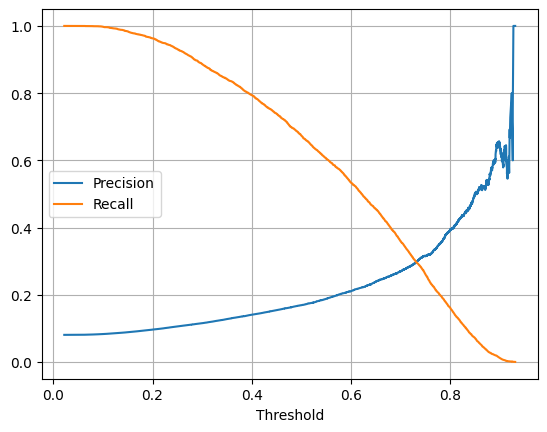

In [158]:
from sklearn.metrics import precision_recall_curve
lgb_pipe.fit(x_train, y_train)
lgb_pipe.predict_proba
y_probs = lgb_pipe.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot to pick a better threshold
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.show();

In [161]:
# Probabilities from model
y_probs = lgb_pipe.predict_proba(x_test)[:, 1]

# Pick a better threshold (say 0.75)
y_pred_adj = (y_probs >= 0.5).astype(int)

# Recalculate metrics
from sklearn.metrics import f1_score, precision_score, recall_score

print("Adjusted Precision:", precision_score(y_test, y_pred_adj))
print("Adjusted Recall:", recall_score(y_test, y_pred_adj))
print("Adjusted F1 Score:", f1_score(y_test, y_pred_adj))
print("Accuracy:", accuracy_score(y_test, y_pred_adj))


Adjusted Precision: 0.16891176025427576
Adjusted Recall: 0.6743202416918429
Adjusted F1 Score: 0.2701525054466231
Accuracy: 0.7058680064387103


### Conclusion
1. The data is imbalanced.
2. Applying smote did not help in this case.
3. PCA Doesnt affect Tree models. PCA on logistic regression did not help improve recall score
4. On default setting LightGBM gives best recall score >70%
5. Threshold of 0.72 gives balance between precission, recall and f1 scores
6. To detect defaulting loan applicants - consider high recall score - low threshold (~0.2)

   

### Challenges
1. Understanding column names
2. variety of data
3. Aggregating other sources of data into training
4. LightGBM supports GPU computing, installing GPU-LightGBM was a time consuming and challenge
